In [1]:
%%html
<font size="10">  <div align="center"> FAIR - JupyterLab - practice </div> </font>  

# Interface discovery

## Connexion to jupyter-lab 

1. Go to this adress: https://hub.mesocentre.uca.fr/hpc-jupyter/hub/login

    <img src="images/jupyter_welcome.png" alt="drawing" width="1000"/>
2. Ask a jupyter session

     <img src="images/start_server.png" alt="drawing" width="1000"/>
3. Submit the job to open the session

     <img src="images/job_choice.png" alt="drawing" width="1000"/>
4. Discover your interface    
     <img src="images/jupyter_page.png" alt="drawing" width="1000"/>



## Discover toolbox

    1. From the github repository of the FAIR practice, import the jupyter session part
        - from the web interface
        - from the cluster terminal
    2. Launch the jupyter.ipynb
    3. Launch a console interface
    4. Launch a terminal interface

### Magic commands a special case

Jupyter notebook has special commands : `magic commands` and `magic cells` \
The magic commands allow you to interact with your environnement to analyse the data. \
To call it, use the `%` symbol before in a `code cell` \
The list of available magic commands is available typing : `%lsmagic`
This command is available only on the line where it is write

The magic cells are cells with specific behaviour due to the magic cell command in the header of the cell \
It is use for example to use command from another language (ruby, bash, R...)

1. List the magic commands

2. List folder content using magic command

3. Make a cell with bash code

<details>
  <summary>Magic command solution</summary>
    
1. ```%lsmagic```
2. ```%ls```
3. 
`%%bash
module load conda/23.3.1 && conda env list
`
</details>
    

# Make your own Kernel to work
To work with you own tools, you need to make a `kernel`.
This is the core of your notebook called when you want to analyse information from cells
You can build your own kernel with Python or R and all available conda software you want

```
Follow the guide from the mesocentre to install your kernel: https://hub.mesocentre.uca.fr/docs/cluster/applis/jupyterhub/
```
1. Install a Python Kernel with python 3.10
```
mamba install -c conda-forge nb_conda_kernels
mamba create -n env_py38 python=3.8 numpy matplotlib pandas scipy dask
mamba activate env_py38
mamba install ipykernel jupyter_client
python -m ipykernel install --user --name env_py38 --display-name "kernel_python_3.8"
```

2. Install a R kernel with r-base 4.2

```
mamba create --name env-r42 r-base=4.2 r-essentials r-irkernel
mamba activate env-r42
mamba install python=3.7 jupyter_client
R -e "IRkernel::installspec(name='env-r42', displayname='env_R_4.2', user=TRUE)"
```

Test available kernels
```
conda activate env_py38
mamba env list
jupyter kernelspec list
```

# Work with both python and R in the same notebook
```
Jupyter also to work both with python and R in the same notebook
The simple way is to create a conda env with python and R, then install a specific library: rpy2
```
1. In the previous R 4.2 kernel install rpy2 from conda
    - use the terminal interface from jupyter
    - activate the conda env containing your R version
    - install rpy2 from conda
3. Create a new notebook file with the kernel containg R and python
4. Call the rpy2 package
`%load_ext rpy2.ipython`

5. Make a notebook with python and R cells

`Now to call a R code into a cell use : magic variables %%R`


### Import python libraries

In [2]:
%load_ext rpy2.ipython
import os
import pandas as pd
import numpy as np
import import_ipynb

### Import R libraries

In [3]:
%%R
# load
library(ggplot2)

### Import a dataframe with python

In [4]:
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})
df.transpose()

,0,1,2,3,4,5,6,7,8,9
cups_of_coffee,0,1,2,3,4,5,6,7,8,9
productivity,2,5,6,8,9,8,0,1,0,-1


### Plot the data with ggplot2

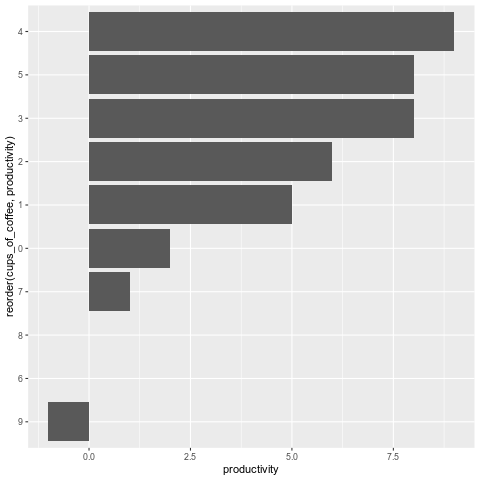

In [5]:
%%R -i df
ggplot(df, aes(x=reorder(cups_of_coffee,productivity), y=productivity)) + geom_col() + coord_flip()

# Genomic in jupyter notebook
## Quality assessement of a SARS-COV-2 sample

Your kernel based on a conda env could be call also to use some installed tools.
Here we added some bioinformatic tools to analyse genomic data.
An advantage to bind a notebook to the cluster is to interact with your environment to submit jobs.
Steps: use fastQC (raw read quality check) on the SRR25109930.fastq.gz sample of the SARS-COV2
1. use fastQC into a jupyter cell and show results
2. use fastQC by the job submission of the cluster using the fastqc.sh file

<details>
  <summary>Solutions</summary>
    
1. ```%lsmagic```
2. ```%ls```
3. 
`%%bash
module load conda/23.3.1 && conda env list
`
</details>
    

In [6]:
%%bash
fastqc test_files/SRR25109930.fastq.gz --outdir test_files

application/gzip


Started analysis of SRR25109930.fastq.gz
Approx 5% complete for SRR25109930.fastq.gz
Approx 10% complete for SRR25109930.fastq.gz
Approx 15% complete for SRR25109930.fastq.gz
Approx 20% complete for SRR25109930.fastq.gz
Approx 25% complete for SRR25109930.fastq.gz
Approx 30% complete for SRR25109930.fastq.gz
Approx 35% complete for SRR25109930.fastq.gz
Approx 40% complete for SRR25109930.fastq.gz
Approx 45% complete for SRR25109930.fastq.gz
Approx 50% complete for SRR25109930.fastq.gz
Approx 55% complete for SRR25109930.fastq.gz
Approx 60% complete for SRR25109930.fastq.gz
Approx 65% complete for SRR25109930.fastq.gz
Approx 70% complete for SRR25109930.fastq.gz
Approx 75% complete for SRR25109930.fastq.gz
Approx 80% complete for SRR25109930.fastq.gz
Approx 85% complete for SRR25109930.fastq.gz
Approx 90% complete for SRR25109930.fastq.gz
Approx 95% complete for SRR25109930.fastq.gz


Analysis complete for SRR25109930.fastq.gz


## Quality alignement of a SARS-COV-2 sample

In [7]:
%%bash
bwa-mem2 index test_files/sars_reference_genome/sequence_sarscov2.fasta

Looking to launch executable "/opt/conda/envs/jupyter/bin/bwa-mem2.avx512bw", simd = .avx512bw
Launching executable "/opt/conda/envs/jupyter/bin/bwa-mem2.avx512bw"
[bwa_index] Pack FASTA... 0.00 sec
* Entering FMI_search
init ticks = 7451218
ref seq len = 59806
binary seq ticks = 5561400
build suffix-array ticks = 28749286


ref_seq_len = 59806
count = 0, 18548, 29903, 41258, 59806
BWT[17048] = 4
CP_SHIFT = 6, CP_MASK = 63
sizeof CP_OCC = 64


pos: 7476, ref_seq_len__: 7475


max_occ_ind = 934


build fm-index ticks = 7288750
Total time taken: 0.0240


In [ ]:
! bwa-mem2 mem test_files/sars_reference_genome/sequence_sarscov2.fasta test_files/SRR25109930.fastq.gz -o test_files/sars_alignment.sam
! samtools view -S -b test_files/sars_alignment.sam > test_files/sars_alignment.bam

Looking to launch executable "/opt/conda/envs/jupyter/bin/bwa-mem2.avx512bw", simd = .avx512bw
Launching executable "/opt/conda/envs/jupyter/bin/bwa-mem2.avx512bw"
-----------------------------
Executing in AVX512 mode!!
-----------------------------
* SA compression enabled with xfactor: 8
* Ref file: test_files/sars_reference_genome/sequence_sarscov2.fasta
* Entering FMI_search
* Index file found. Loading index from test_files/sars_reference_genome/sequence_sarscov2.fasta.bwt.2bit.64
* Reference seq len for bi-index = 59807
* sentinel-index: 17048
* Count:
0,	1
1,	18549
2,	29904
3,	41259
4,	59807

* Reading other elements of the index from files test_files/sars_reference_genome/sequence_sarscov2.fasta
* Index prefix: test_files/sars_reference_genome/sequence_sarscov2.fasta
* Read 0 ALT contigs
* Done reading Index!!
* Reading reference genome..
* Binary seq file = test_files/sars_reference_genome/sequence_sarscov2.fasta.0123
* Reference genome size: 59806 bp
* Done reading reference 

## Transcriptomic analysis from raw data to differential expression results
### Transcript count

In [ ]:
! kallisto index -i "test_files/hg38_transcripts.fa" "test_files/hg38_F.fq.gz" "test_files/hg38_R.fq.gz"

In [ ]:
! kallisto quant -i "test_files/hg38_transcripts.fa" "test_files/hg38_F.fq.gz" "test_files/hg38_R.fq.gz" -b 100 -o "test_files/kallisto_output"

In [ ]:
## Differential analysis of counts

In [ ]:
%%R
library("DESeq2")
library("tximportData")
library("tximport")
library("readr")

In [ ]:
%%R
# import data
dir <- system.file("extdata", package="tximportData")
samples <- read.table(file.path(dir,"samples.txt"), header=TRUE)
samples$condition <- factor(rep(c("control","treated"),each=3))
rownames(samples) <- samples$run
samples[,c("pop","center","run","condition")]


In [ ]:
%%R
# transform data
files <- file.path(dir,"salmon", samples$run, "quant.sf.gz")
names(files) <- samples$run
tx2gene <- read_csv(file.path(dir, "tx2gene.gencode.v27.csv"))
txi <- tximport(files, type="salmon", tx2gene=tx2gene)

In [ ]:
%%R
# translate data as deseq2 input
ddsTxi <- DESeqDataSetFromTximport(txi,
                                   colData = samples,
                                   design = ~ condition)

In [ ]:
%%R
# Use DESeq2 model
dds <- DESeq(ddsTxi)
res <- results(dds)

In [ ]:
%%R
#Plot DE outputs
xlim <- c(1,1e5); ylim <- c(-3,3)
plotMA(res, xlim=xlim, ylim=ylim, main="normal")

In [ ]:
%%R
vsd <- vst(dds, blind=FALSE)
sampleDists <- dist(t(assay(vsd)))

In [ ]:
%%R
# Plot of sample distance
library(pheatmap)
library("RColorBrewer")
library("pheatmap")
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd$condition, vsd$sample, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)


In [ ]:
%%R
plotPCA(vsd, intgroup=c("condition"))